In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

% matplotlib inline

import os
os.chdir('.')

import warnings
warnings.filterwarnings('ignore')

### 逻辑回归

In [2]:
# 加载数据

data1 = np.loadtxt('./data1.txt', delimiter=',')
data2 = np.loadtxt('./data2.txt', delimiter=',')

In [3]:
X1 = np.c_[np.ones((data1.shape[0], 1)), data1[:, :-1]]
y1 = np.c_[data1[:, -1]]

X2 = np.c_[np.ones((data2.shape[0], 1)), data2[:, :-1]]
y2= np.c_[data2[:, -1]]

In [4]:
y_test = [data1[:, -1]]

In [5]:
type(y_test)

list

总结将列表对象转换成一维数组的几种方法：

* 使用np.c_[]连接命令，可以将列表转换成一维数组
* 使用np.asarray()方法也可以实现

我们来分别试下

In [6]:
y_test_c = np.c_[y_test]

In [7]:
type(y_test_c)

numpy.ndarray

In [8]:
y_test_c.shape

(1, 100)

In [9]:
y_test_asarray = np.asarray(y_test)

In [10]:
type(y_test_asarray)

numpy.ndarray

In [11]:
y_test_asarray.shape

(1, 100)

而对于ndarray数组，我们还可以使用如下：

* [:, np.newaxis]转换成矩阵，特别适合于是series对象
* .reshape()变换维度

另外，我们的dataframe还支持转换成矩阵.as_matrix()

np.asmatrix()将数组转换成矩阵，np.asarray()矩阵，列表转换成数组

In [12]:
y_test_asarray[:, np.newaxis].shape

(1, 1, 100)

In [13]:
y_test_asarray.reshape(10, 5, 2).shape

(10, 5, 2)

In [14]:
# 绘图图像，获知数据分布

def plotScatter(data, xlabel, ylabel, legend):
    
    X_fail = data[data[:, -1] == 0][:, :-1]  
    X_pass = data[data[:, -1] == 1][:, :-1]

    plt.scatter(X_fail[:, 0], X_fail[:, 1], marker='x', color='r')
    plt.scatter(X_pass[:, 0], X_pass[:, 1], marker='o', color='g')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend)

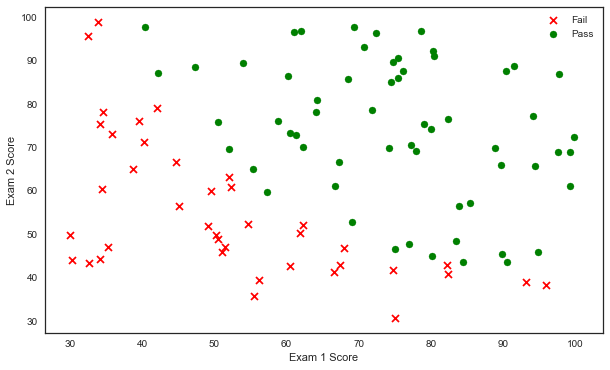

In [15]:
plt.figure(figsize=(10, 6))
plotScatter(data1, 'Exam 1 Score', 'Exam 2 Score', ['Fail', 'Pass'])

In [16]:
# 定义Sigmod预测函数

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
# 定义损失函数

def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1.0 * (1.0 / m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    return J[0]

在求解梯度前，我们需要对损失函数求导，得到负梯度的方向的值：

逻辑回归的损失函数：

$$J(\theta) = - \frac{1}{m}\bigr[y\log h_\theta(x) + \bigr(1 - y\bigr)\log\bigr(1 - h_\theta(x)\bigr)\bigr]$$

而我们有$h_\theta(x) = \frac{1}{1 + e^{-\theta x}}$，令$z = \theta x$，继而有$h_\theta(z) = \frac{1}{1 + e^{-z}}$，带入上式中：

$$\begin{align*}
J(\theta) &= - \frac{1}{m}\bigr[y\log h_\theta(x) + \bigr(1 - y\bigr)\log\bigr(1 - h_\theta(x)\bigr)\bigr] \\
&= - \frac{1}{m}\bigr[y\log\frac{1}{1 + e^{-z}} + \bigr(1 - y\bigr)\log\frac{e^{- z}}{1 + e^{-z}}\bigr] \\
&= - \frac{1}{m}\bigr[- y\log\bigr(1 + e^{-z}\bigr) + \bigr(1 - y\bigr)\bigr(\log e^{-z} - \log \bigr(1 + e^{-z}\bigr)\bigr)\bigr] \\
&= - \frac{1}{m}\bigr[- y \log\bigr(1 + e^{-z}\bigr) + \bigr(1 - y\bigr)\bigr(- z - \log \bigr(1 + e^{-z}\bigr)\bigr)\bigr] \\
&= - \frac{1}{m}\bigr[z\bigr(y - 1\bigr) - \log \bigr(1 + e^{-z}\bigr)\bigr]
\end{align*}$$

$$\begin{align*}
\frac{\partial J(\theta)}{\partial \theta} &= - \frac{1}{m} \bigr[x\bigr(y-1\bigr) - \frac{1}{1 + e^{-z}}e^{-z}\bigr(-x\bigr)\bigr] \\
&= - \frac{1}{m}\bigr[x\bigr(y-1\bigr) + x\bigr(1 - h_\theta(x)\bigr)\bigr] \\
&= - \frac{1}{m}\bigr[y - h_\theta(x)\bigr]x \\
&= \frac{1}{m}\bigr[h_\theta(x) - y\bigr]x
\end{align*}$$

In [18]:
# 定义梯度

def gradientDesent(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(3, 1)))
    grad = (1.0 / m) * (X.T.dot(h - y))
    return grad.flatten()

In [19]:
initial_theta = np.zeros(X1.shape[1])
cost = costFunction(initial_theta, X1, y1)
grad = gradientDesent(initial_theta, X1, y1)

print('损失为：', cost)
print('梯度为：', grad)

损失为： 0.6931471805599453
梯度为： [ -0.1        -12.00921659 -11.26284221]


In [43]:
initial_theta1 = np.array([-25.16133284,   0.2062317 ,   0.2014716 ])
h1 = sigmoid(X1.dot(initial_theta1.reshape(3, 1)))

In [48]:
X111 = np.array([[1, 10000, 1000000],[1, 3232, 2322323],[1, 2332, 454353453], [1, 3242,435353]])
h111 = sigmoid(X111.dot(initial_theta1.reshape(3, 1)))

In [51]:
h1[:4]

array([[9.10338074e-02],
       [4.22587186e-05],
       [4.39088101e-02],
       [9.90424719e-01]])

In [50]:
h111

array([[1.],
       [1.],
       [1.],
       [1.]])

> 说明：<font color='red'>我们可以看到如果X111的幅度不一致，存在过大的特征列，每次计算得到的grad梯度可能都为0，也就造成函数不收敛，达不到优化的效果！！所以我们在使用逻辑回归时，需要注意各个特征列的幅度是否一致！！</font>

In [21]:
# 最小化损失函数

mimz = minimize(costFunction, initial_theta, args=(X1, y1), jac=gradientDesent, options={'maxiter': 400})

In [22]:
mimz

      fun: 0.20349770158944377
 hess_inv: array([[ 3.31474479e+03, -2.63892205e+01, -2.70237122e+01],
       [-2.63892205e+01,  2.23869433e-01,  2.02682332e-01],
       [-2.70237122e+01,  2.02682332e-01,  2.35335117e-01]])
      jac: array([-9.52476817e-09, -9.31921315e-07, -2.82608927e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

上述return参数说明：

* fun：返回的是损失函数的最终损失值
* hess_inv：海森矩阵的逆矩阵值
* jac：返回梯度值，一个数组对象，必须与costFunction输入相同的值
* x：为设置的初始值theta
* nit：为迭代次数

这边在使用minimize最小化优化函数时，需要注意的地方：

* 我们自定的costFunction里传递的参数是有顺序的，先是theta参数，然后是X输入数据，最后是y输出数据
* 同时自定义的gradient函数里的参数也是如此，需要跟minimize()里的参数顺序对应，minimize()是先x0初始化参数对应theta参数，然后args里的参数，对应输入X和输入y
* 另外还有就是gradient函数输出的是一个3x1的列向量，而minimize()里需要的是行向量，所以我们需要用.flatten()将其转换为一维行向量

如果不这样做，会出现维度不一致的情况，这也是挺搞的，我觉得这应该是编程时的bug，没有考虑到！！

我们来预测一下：

In [23]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return p.astype('int')

In [24]:
sigmoid(np.array([1, 30, 90]).dot(mimz.x.T))

0.3011268426897256

In [25]:
predict(mimz.x, np.array([1, 30, 90]))

0

p.astype('int')通过对p概率值的转换，得到通过1，不通过0的结果输出

我们来画下决策边界

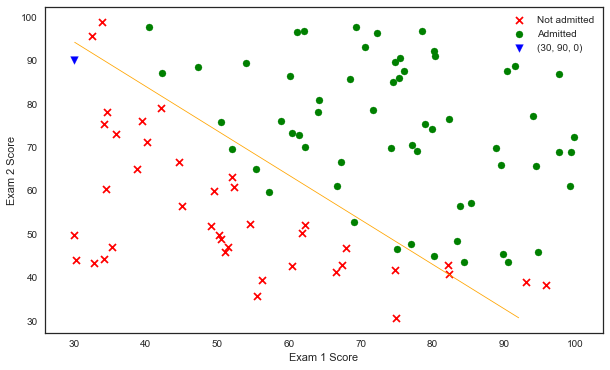

In [26]:
plt.figure(figsize=(10, 6))
plotScatter(data1, 'Exam 1 Score', 'Exam 2 Score', ['Admitted', 'Not admitted'])
plt.scatter(30, 90, s=60, c='b', marker='v', label='(30, 90)')
x1_min, x1_max = X1[:, 1].min(), X1[:, 1].max()
x2_min, x2_max = X1[:, 2].min(), X1[:, 2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(mimz.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], colors='orange', linewidths=0.8)
plt.legend(['Not admitted', 'Admitted', '(30, 90, 0)'])

以上绘图疑惑分析：

在二维坐标系中，绘制一个点，需要该点的x轴和y轴的坐标，而画一条直线呢，需要至少两个点的坐标，同样，拓展到三维，一个点需要x,y,z轴的数值，一条直线，至少三维空间中的两个点坐标，而如果是一个平面，则至少需要两条直线，也就是说这边每条直线100个点，和2个点是没有区别的！（说明三维空间中的x1,x2对应平面坐标中的x,y）

np.ones((xx1.ravel().shape[0], 1))是按照xx1的维度(10000,)添加元素为1的列向量

np.meshgrid函数是将一维数组转换为二维的网格矩阵，一维数组可表示为行向量，而二维矩阵，是由多个一维数组数组元素构成的列向量组成，xx1是好比代表的是x轴的网格矩阵，xx2代表的是y轴的网格矩阵，h则是z轴的，一个三维空间就相当于在这50x50x50的网格空间找元素，然后填充到三维坐标中...

具体的来说，meshgrid()就是来产生坐标矩阵的，而对于三维图像绘制，x,y轴坐标诸如以下表示：

(3,9),(4,9),(5,9);

(3,8),(4,8),(5,8);

(3,7),(4,7),(5,7);

(3,6),(4,6),(5,6);

那我们单独把x, y轴的数据拉出来，就构成了x, y的坐标矩阵：

把各个点的x坐标独立出来，得：

3,4,5;

3,4,5;

3,4,5;

3,4,5;

再把各个点的y坐标也独立出来：

9,9,9;

8,8,8;

7,7,7;

6,6,6;

实际上在平面坐标系中，x,y 都是只有50个数据，而要到三维空间，这个数据点就得变成50x50=2500个数据... 为什么要这样组合，因为三维空间有第三个坐标系z，也就是我们在保持x,y轴不变的情况下，z的数目的变化组成的只是空间中的一条线，而要是空间的一个平面的话，则需要另外50组数据，所以共有50x50x50组的数据组成一平面...

### 加入正则化项的逻辑回归

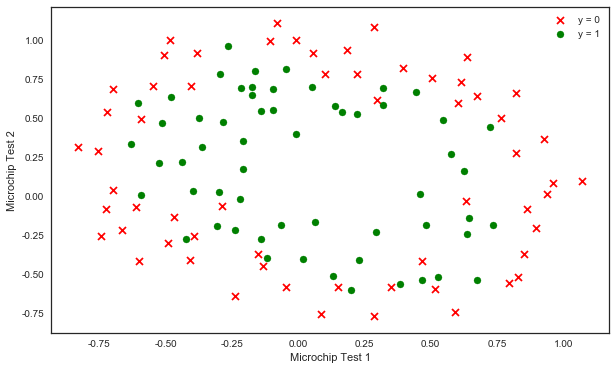

In [27]:
plt.figure(figsize=(10, 6))
plotScatter(data2, 'Microchip Test 1', 'Microchip Test 2', ['y = 0', 'y = 1'])

#### 将特征整成高阶项

In [28]:
poly = PolynomialFeatures(6)
XX2 = poly.fit_transform(data2[:, :-1])

In [29]:
XX2.shape

(118, 28)

再定义损失函数和梯度之前，我们先来看下其函数表达式（注意这边省去了样本表达）：

$$J(\theta) = - \frac{1}{m}\bigr[y\log h_\theta(x) + \bigr(1 - y\bigr)\log\bigr(1 - h_\theta(x)\bigr)\bigr] + \frac{\lambda}{2m}\theta^2$$

梯度为：

$$\frac{1}{m}\bigr[h_\theta(x) - y\bigr]x + \frac{\lambda}{m}\theta_j \hspace{0.2cm} \forall_j ∈ [1, d] \hspace{0.1cm} not \hspace{0.1cm} include \hspace{0.1cm} [0] \hspace{0.1cm} element$$

In [30]:
# 定义损失函数

def costFunctionReg(theta, λ, *args):
    m = y2.size
    h = sigmoid(XX2.dot(theta))
    J = -1.0 * (1.0 / m) * (np.log(h).dot(y2) + np.log(1 - h).dot(1 - y2)) + λ / (2.0 * m) * (theta[1:].dot(theta[1:]))
    return J[0]

In [31]:
# 定义梯度

def gradientDesentReg(theta, λ, *args):
    m = y2.size
    h = sigmoid(XX2.dot(theta.reshape(-1, 1)))
    grad = (1.0 / m) * (XX2.T.dot(h - y2)) + (λ / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]
    return grad.flatten()

在这边我们看到有一个np.r_的函数，前面遇到过一个np.c_的函数，挺奇怪，我们来总结下：

其实np.c_是将两数组按列合并，要求列中元素个数一致，类似于pandas中的pd.concat(axis=1)的情况；

而对于np.r_则是按行合并，行中的元素个数也要要求一致，类似于pd.concat(axis=0)的情况；

就是因为这边用到了np.r_这个函数，我们对于函数表达式中的$\theta_0$是不应该对它进行“惩罚”的，因为该项为截距项，本来就是属于函数表达式，该是什么就是什么，所以无论是在损失函数中还是在梯度定义中，都应该把这项在正则里区别对待，对于损失函数则应该去掉这项，只有$\theta_1$之后的参数，而在梯度中我们需要在正则里将其定义为0，也就是说不做“乘法”的意思，并$\theta_1$之后的优化参数合并在一起...

In [32]:
λ = 0.1
initial_theta_reg = np.zeros(XX2.shape[1])
costReg = costFunctionReg(initial_theta_reg, 0.1, XX2, y2)
gradReg = gradientDesentReg(initial_theta_reg, 0.1, XX2, y2)

print('损失为：', costReg)
print('梯度为：', gradReg)

损失为： 0.6931471805599453
梯度为： [8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02 3.76648474e-02 1.83559872e-02 7.32393391e-03
 8.19244468e-03 2.34764889e-02 3.93486234e-02 2.23923907e-03
 1.28600503e-02 3.09593720e-03 3.93028171e-02 1.99707467e-02
 4.32983232e-03 3.38643902e-03 5.83822078e-03 4.47629067e-03
 3.10079849e-02 3.10312442e-02 1.09740238e-03 6.31570797e-03
 4.08503006e-04 7.26504316e-03 1.37646175e-03 3.87936363e-02]


In [33]:
mimzReg = minimize(costFunctionReg, initial_theta_reg, args=(λ, XX2, y2), jac=gradientDesentReg, options={'maxiter': 3000})

下面我们通过调整不同的$\lambda$值来看下我们的模型的分类情况，是不是会出现欠拟合，过拟合...

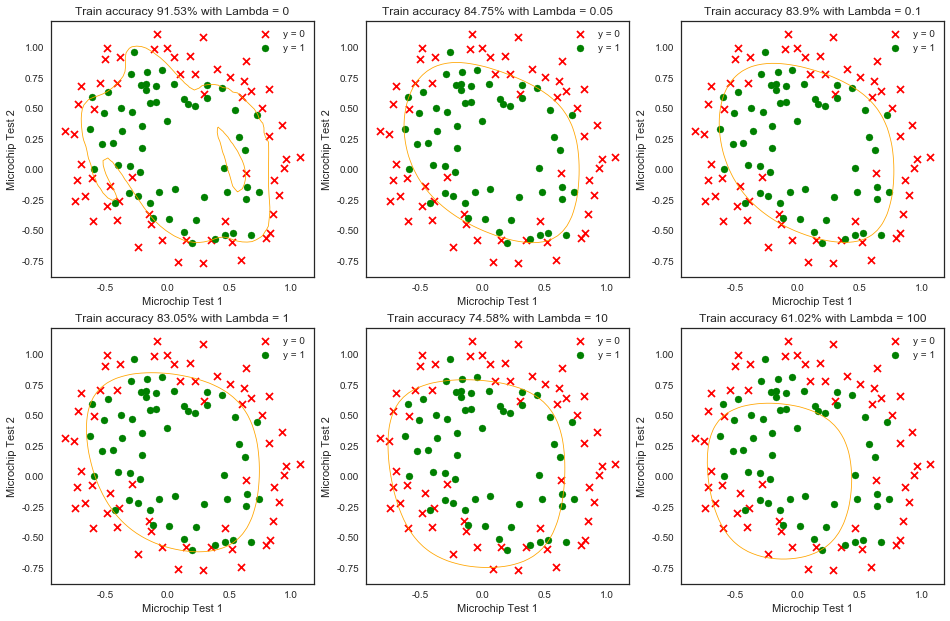

In [34]:
from sklearn.metrics import accuracy_score

fig = plt.figure(num=1, figsize=(16, 16))

for i, λ in zip(range(6), [0, 0.05, 0.1, 1, 10, 100]):
    mimzReg = minimize(costFunctionReg, initial_theta_reg, args=(λ, XX2, y2), jac=gradientDesentReg, options={'maxiter': 3000})
    accuracy = accuracy_score(predict(mimzReg.x, XX2), y2)
    
    fig.add_subplot(3, 3, i+1)
    plotScatter(data2, 'Microchip Test 1', 'Microchip Test 2', ['y = 0', 'y = 1'])
    
    x1_min, x1_max = XX2[:, 1].min(), XX2[:, 1].max()
    x2_min, x2_max = XX2[:, 2].min(), XX2[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(mimzReg.x))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], colors='orange', linewidths=0.8)
    plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy*100, decimals=2), λ))

np.c_将列向量连接成矩阵的，应该多熟悉下，还有np.r_。poly.fit_transform()方法可以增加原特征的次方，一般能够从线性模型到非线性模型进行转变。minimize()用于数值优化的，特别适用于迭代。对于等式中的涉及的不同变量的维度关系，我们需要先确定结果的维数，然后看下每个变量的维度，特别是做点乘时，一个变量的列数要与另一个变量的行数对应才能点乘，不然会报错，维度不一致无法点乘，也就是矩阵运算；另外还得注意数据运算的加减法，维度也要一直，不一致虽然也能够运算，但是维度会发生变化！添加正则化时，一般函数中的$\theta_0$是无需“惩罚”的，这个是人为定义的截距项！

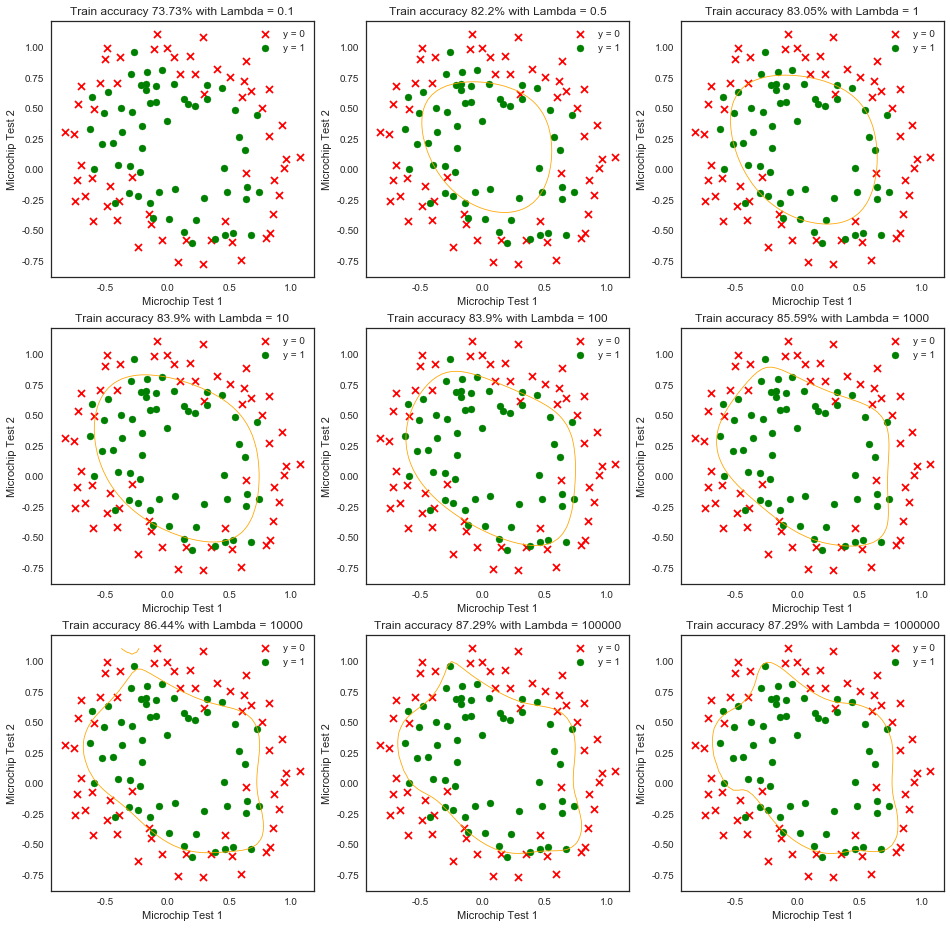

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

fig = plt.figure(num=1, figsize=(16, 16))

for i, C in zip(range(9), [0.1, 0.5, 1, 10, 100, 1000, 10000, 100000, 1000000]):
                
    LR = LogisticRegression(C=C, max_iter=1000)
    LR.fit(XX2, y2)
    accuracy = accuracy_score(LR.predict(XX2), y2)
    
    fig.add_subplot(3, 3, i+1)
    plotScatter(data2, 'Microchip Test 1', 'Microchip Test 2', ['y = 0', 'y = 1'])
    
    x1_min, x1_max = XX2[:, 1].min(), XX2[:, 1].max()
    x2_min, x2_max = XX2[:, 2].min(), XX2[:, 2].max()
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = LR.decision_function(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]))
    h = h.reshape(xx1.shape)
    plt.contour(xx1, xx2, h, [0.5], colors='orange', linewidths=0.8)
    plt.title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy*100, decimals=2), C))

sklearn使用的logisticregressor好想是c值越大，越容易过拟合，而不是越小，估计正则化项应该是被剪掉的，所以会相反..

In [36]:
import os
os.chdir('/Users/johnnie/ML/liblinear/python')

In [37]:
from liblinearutil import *

In [38]:
# 读入libsvm格式数据
# y, x = svm_read_problem('./aloi.scale')

# 将y, x写作prob
# prob = problem(y, x)

# 将参数命令写作param
# param = parameter('-s 3 -c 5 -q')

# 进行训练
# m = train(prob, param)

In [39]:
# 进行交叉验证，并返回精度
# cv_acc = train(y, x, '-v 3') # '-v 3'是三折交叉

# 返回最佳参数c和学习率
# best_c, best_rate = train(y, x, '-C -s 0')

# 预测结果
# p_labs, p_acc, p_vals = predict(y, x, m, ['predicting_options'])
# y是测试集标签，这里用于计算精度
# x为待预测样本
# p_labs：预测出的标签
# p_acc：元组类型，返回预测精度，MSE，Squared correlation coefficient(平方相关系数)
# p_vals：列表，返回概率值，没有转换为0，1

# (ACC, MSE, SCC) = evaluations(y, p_labs)
# y是真实值
# p_labs是预测值

以上参考：https://blog.csdn.net/sinat_22548843/article/details/46931831

常用函数 
train()：训练线性模型

predict()：对testing数据做预测

svm_read_problem()：读取libsvm格式的数据

load_model()：load模型

save_model()：将模型存储为文件

evaluations()：评价预测结果